In [50]:
import pyspark as ps

In [51]:
spark = (ps.sql.SparkSession.builder 
        .master("local[4]") 
        .appName("sparkSQL exercise")
        .config("spark.sql.caseSensitive", "true")
        .getOrCreate()
        )
sc = spark.sparkContext

In [13]:
!ls

20210604_203521.Default.w0t0p0.CFBE54F3-566C-4194-BF2A-537405AC2C87.318.2748041909.log
Capstone.ipynb
Data Visualization Cheat Sheet.pdf
Galvi 2017
ISLR+Seventh+Printing.pdf
Ilya_Getsin_unix.txt
Logs
Morning Warmups
Numpy Cheat Sheet.pdf
Pandas Data Sheet.pdf
Practical Statistics for Data Scientists.pdf
Precourse
Pyspark Cheat Sheet.pdf
Repos
Supply_Chain_Shipment_Pricing_Data.csv
TrustworthyOnlineControlledExperiments_PracticalGuideToABTesting_Chapter1.pdf
Zillow.ipynb
Zillow.py
atom-one-dark-terminal
dblp.v13.7z
dblpv13.json
lectures
spark-warehouse


In [56]:
peer = spark.read.json('new.json')

In [ ]:
spark.read.json

In [57]:
peer.printSchema()

root
 |-- _id: string (nullable = true)
 |-- abstract: string (nullable = true)
 |-- authors: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- _id: string (nullable = true)
 |    |    |-- bio: string (nullable = true)
 |    |    |-- email: string (nullable = true)
 |    |    |-- gid: string (nullable = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- name_zh: string (nullable = true)
 |    |    |-- oid: string (nullable = true)
 |    |    |-- oid_zh: string (nullable = true)
 |    |    |-- orcid: string (nullable = true)
 |    |    |-- org: string (nullable = true)
 |    |    |-- org_zh: string (nullable = true)
 |    |    |-- orgid: string (nullable = true)
 |    |    |-- orgs: array (nullable = true)
 |    |    |    |-- element: string (containsNull = true)
 |    |    |-- orgs_zh: array (nullable = true)
 |    |    |    |-- element: string (containsNull = true)
 |    |    |-- sid: string (nullable = true)
 |-- doi: string (nulla

In [58]:
peer.take(10)

[Row(_id='{"$oid":"53e99784b7602d9701f3e3f4"}', abstract='', authors=[Row(_id='{"$oid":"53f46946dabfaec09f24b4ed"}', bio=None, email=None, gid=None, name='Miguel Palma', name_zh=None, oid=None, oid_zh=None, orcid=None, org=None, org_zh=None, orgid=None, orgs=None, orgs_zh=None, sid='8515747')], doi='10.1145/1665137.1665166', fos=None, isbn=None, issn=None, issue='', keywords=[], lang='en', n_citation=0, page_end=None, page_start='39', pdf=None, references=None, title='360degree', url=['http://doi.acm.org/10.1145/1665137.1665166', 'db/conf/siggraph/siggraph2009asiaart.html#Palma09', 'https://doi.org/10.1145/1665137.1665166'], venue=Row(_id='{"$oid":"53a72b2d20f7420be8c1c5a8"}', issn=None, name=None, name_d=None, name_s=None, online_issn=None, publisher=None, raw='SIGGRAPH ASIA Art Gallery & Emerging Technologies', raw_zh=None, sid=None, src=None, t=None, type=None), volume='', year=2009),
 Row(_id='53e99784b7602d9701f3e3f5', abstract=None, authors=None, doi=None, fos=None, isbn=None, is

In [59]:
peer.createOrReplaceTempView("peer")

In [61]:
result = spark.sql("""SELECT lang, COUNT(lang)
            FROM peer 
            GROUP BY lang
            """)

result.show()

+----+-----------+
|lang|count(lang)|
+----+-----------+
|  en|    1999830|
|  zh|        170|
+----+-----------+



In [60]:
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import StringType
name = '_corrupt_record'
udf = UserDefinedFunction(lambda x: x.strip(','), StringType())
new_df = peer.select(*[udf(column).alias(name) if column == name else column for column in peer.columns])

In [61]:
new_df

DataFrame[_corrupt_record: string, _id: struct<$oid:string>, abstract: string, authors: array<struct<_id:struct<$oid:string>,name:string,sid:string>>, doi: string, issue: string, keywords: array<string>, lang: string, n_citation: bigint, page_start: string, title: string, url: array<string>, venue: struct<_id:struct<$oid:string>,raw:string>, volume: string, year: bigint]

In [70]:
peer.take(10)[3]['_corrupt_record'][0]

','

In [12]:
df = peer.toPandas()

AnalysisException: Since Spark 2.3, the queries from raw JSON/CSV files are disallowed when the
referenced columns only include the internal corrupt record column
(named _corrupt_record by default). For example:
spark.read.schema(schema).json(file).filter($"_corrupt_record".isNotNull).count()
and spark.read.schema(schema).json(file).select("_corrupt_record").show().
Instead, you can cache or save the parsed results and then send the same query.
For example, val df = spark.read.schema(schema).json(file).cache() and then
df.filter($"_corrupt_record".isNotNull).count().

In [26]:
n = 10
with open('dblpv13.json') as f:
    for i in range(0, n):
        print(f.readline(), end = '')

[
{"_id": {"$oid": "53e99784b7602d9701f3e3f4"}, "title": "360degree", "authors": [{"_id": {"$oid": "53f46946dabfaec09f24b4ed"}, "name": "Miguel Palma", "sid": "8515747"}], "venue": {"_id": {"$oid": "53a72b2d20f7420be8c1c5a8"}, "raw": "SIGGRAPH ASIA Art Gallery & Emerging Technologies"}, "year": 2009, "keywords": [], "n_citation": 0, "page_start": "39", "lang": "en", "volume": "", "issue": "", "doi": "10.1145/1665137.1665166", "url": ["http://doi.acm.org/10.1145/1665137.1665166", "db/conf/siggraph/siggraph2009asiaart.html#Palma09", "https://doi.org/10.1145/1665137.1665166"], "abstract": ""}
,{"_id": "53e99784b7602d9701f3e3f5", "title": "3GIO.", "venue": {"type": 0}, "year": 2011, "keywords": [], "n_citation": 0, "lang": "en"}
,{"_id": "53e99784b7602d9701f3e133", "title": "The relationship between canopy parameters and spectrum of winter wheat under different irrigations in Hebei Province.", "authors": [{"_id": "53f45728dabfaec09f209538", "name": "Peijuan Wang"}, {"_id": "5601754345cedb3

In [27]:
import IO

ModuleNotFoundError: No module named 'IO'

In [43]:
temp = [
{"_id": {"$oid": "53e99784b7602d9701f3e3f4"}, "title": "360degree", "authors": [{"_id": {"$oid": "53f46946dabfaec09f24b4ed"}, "name": "Miguel Palma", "sid": "8515747"}], "venue": {"_id": {"$oid": "53a72b2d20f7420be8c1c5a8"}, "raw": "SIGGRAPH ASIA Art Gallery & Emerging Technologies"}, "year": 2009, "keywords": [], "n_citation": 0, "page_start": "39", "lang": "en", "volume": "", "issue": "", "doi": "10.1145/1665137.1665166", "url": ["http://doi.acm.org/10.1145/1665137.1665166", "db/conf/siggraph/siggraph2009asiaart.html#Palma09", "https://doi.org/10.1145/1665137.1665166"], "abstract": ""}
,{"_id": "53e99784b7602d9701f3e3f5", "title": "3GIO.", "venue": {"type": 0}, "year": 2011, "keywords": [], "n_citation": 0, "lang": "en"}
,{"_id": "53e99784b7602d9701f3e161", "title": "360°", "authors": [{"_id": "53f46946dabfaec09f24b4ed", "name": "Miguel Palma", "org": "Miguel Palma Studio", "gid": "5b86cf1ae1cd8e14a3fc787b", "oid": "544bd9c245ce266baf189c4f"}], "venue": {"_id": "5390a74a20f70186a0e8b40b", "raw": "ACM SIGGRAPH ASIA 2009 Art Gallery & Emerging Technologies: Adaptation"}, "year": 2009, "keywords": ["global high technology", "daily short-distance flight", "enormous waste", "daily life"], "page_start": "39", "page_end": "39", "lang": "en", "volume": "", "issue": "", "issn": "", "isbn": "", "doi": "10.1145/1665137.1665166", "abstract": "360° represents the concerns that are addressed in most of my work and my approach to it: the effect of global high technology on daily life and the environment (for example, daily short-distance flights to avoid enormous wastes of time)."}]

In [44]:
temp

[{'_id': {'$oid': '53e99784b7602d9701f3e3f4'},
  'title': '360degree',
  'authors': [{'_id': {'$oid': '53f46946dabfaec09f24b4ed'},
    'name': 'Miguel Palma',
    'sid': '8515747'}],
  'venue': {'_id': {'$oid': '53a72b2d20f7420be8c1c5a8'},
   'raw': 'SIGGRAPH ASIA Art Gallery & Emerging Technologies'},
  'year': 2009,
  'keywords': [],
  'n_citation': 0,
  'page_start': '39',
  'lang': 'en',
  'volume': '',
  'issue': '',
  'doi': '10.1145/1665137.1665166',
  'url': ['http://doi.acm.org/10.1145/1665137.1665166',
   'db/conf/siggraph/siggraph2009asiaart.html#Palma09',
   'https://doi.org/10.1145/1665137.1665166'],
  'abstract': ''},
 {'_id': '53e99784b7602d9701f3e3f5',
  'title': '3GIO.',
  'venue': {'type': 0},
  'year': 2011,
  'keywords': [],
  'n_citation': 0,
  'lang': 'en'},
 {'_id': '53e99784b7602d9701f3e161',
  'title': '360°',
  'authors': [{'_id': '53f46946dabfaec09f24b4ed',
    'name': 'Miguel Palma',
    'org': 'Miguel Palma Studio',
    'gid': '5b86cf1ae1cd8e14a3fc787b',
  

In [45]:
import json
with open('temp.json', 'w') as f:
    json.dump(temp, f)

In [46]:
test = spark.read.json('temp.json', multiLine = True)

In [47]:
test.printSchema()

root
 |-- _id: string (nullable = true)
 |-- abstract: string (nullable = true)
 |-- authors: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- _id: string (nullable = true)
 |    |    |-- gid: string (nullable = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- oid: string (nullable = true)
 |    |    |-- org: string (nullable = true)
 |    |    |-- sid: string (nullable = true)
 |-- doi: string (nullable = true)
 |-- isbn: string (nullable = true)
 |-- issn: string (nullable = true)
 |-- issue: string (nullable = true)
 |-- keywords: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- lang: string (nullable = true)
 |-- n_citation: long (nullable = true)
 |-- page_end: string (nullable = true)
 |-- page_start: string (nullable = true)
 |-- title: string (nullable = true)
 |-- url: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- venue: struct (nullable = true)
 |    |-- _id: str

In [3]:
import json
from tqdm import tqdm # google this
journals = []
idx = 0

new = open("new.json", "w")

with open('dblpv13.json',"r") as fp:
     for line in tqdm(fp):
        if idx > 2000000: 
            break
        try:
            if len(line) < 3:
                continue
            strip_line = line.strip(',')
#             hello = json.loads(strip_line)
#             print(str(hello))
            journals.append(json.loads(strip_line))
#             new.write(strip_line)
            idx += 1
        except:
            print('fail')
            try:
                strip_line = line.strip(',')
                journals.append(json.loads(strip_line))
#                 new.write(strip_line + "\n")
                idx += 1
            except:
                idx += 1
                pass
            

2000002it [06:25, 5190.76it/s] 


In [4]:
journals

[{'_id': {'$oid': '53e99784b7602d9701f3e3f4'},
  'title': '360degree',
  'authors': [{'_id': {'$oid': '53f46946dabfaec09f24b4ed'},
    'name': 'Miguel Palma',
    'sid': '8515747'}],
  'venue': {'_id': {'$oid': '53a72b2d20f7420be8c1c5a8'},
   'raw': 'SIGGRAPH ASIA Art Gallery & Emerging Technologies'},
  'year': 2009,
  'keywords': [],
  'n_citation': 0,
  'page_start': '39',
  'lang': 'en',
  'volume': '',
  'issue': '',
  'doi': '10.1145/1665137.1665166',
  'url': ['http://doi.acm.org/10.1145/1665137.1665166',
   'db/conf/siggraph/siggraph2009asiaart.html#Palma09',
   'https://doi.org/10.1145/1665137.1665166'],
  'abstract': ''},
 {'_id': '53e99784b7602d9701f3e3f5',
  'title': '3GIO.',
  'venue': {'type': 0},
  'year': 2011,
  'keywords': [],
  'n_citation': 0,
  'lang': 'en'},
 {'_id': '53e99784b7602d9701f3e133',
  'title': 'The relationship between canopy parameters and spectrum of winter wheat under different irrigations in Hebei Province.',
  'authors': [{'_id': '53f45728dabfaec0

In [14]:
import pandas as pd

In [ ]:
panda_test = pd.read_json('dblpv13.json', orient = 'records')

In [18]:
journals

[{'_id': {'$oid': '53e99784b7602d9701f3e3f4'},
  'title': '360degree',
  'authors': [{'_id': {'$oid': '53f46946dabfaec09f24b4ed'},
    'name': 'Miguel Palma',
    'sid': '8515747'}],
  'venue': {'_id': {'$oid': '53a72b2d20f7420be8c1c5a8'},
   'raw': 'SIGGRAPH ASIA Art Gallery & Emerging Technologies'},
  'year': 2009,
  'keywords': [],
  'n_citation': 0,
  'page_start': '39',
  'lang': 'en',
  'volume': '',
  'issue': '',
  'doi': '10.1145/1665137.1665166',
  'url': ['http://doi.acm.org/10.1145/1665137.1665166',
   'db/conf/siggraph/siggraph2009asiaart.html#Palma09',
   'https://doi.org/10.1145/1665137.1665166'],
  'abstract': ''},
 {'_id': '53e99784b7602d9701f3e3f5',
  'title': '3GIO.',
  'venue': {'type': 0},
  'year': 2011,
  'keywords': [],
  'n_citation': 0,
  'lang': 'en'},
 {'_id': '53e99784b7602d9701f3e133',
  'title': 'The relationship between canopy parameters and spectrum of winter wheat under different irrigations in Hebei Province.',
  'authors': [{'_id': '53f45728dabfaec0

In [6]:
journals[1]['_id']

'53e99784b7602d9701f3e3f5'

In [8]:
import pandas as pd
journal_df = pd.DataFrame(journals, columns = journals[0].keys())

In [9]:
journal_df[journal_df.year == 0]

_id  \
1119     53e9978ab7602d9701f45935   
3917     53e99792b7602d9701f57ee8   
6384     53e9979bb7602d9701f67aba   
6915     53e9979eb7602d9701f6ae79   
8965     53e997a2b7602d9701f77076   
...                           ...   
1978682  53e9b677b7602d97041e0280   
1988216  53e9b699b7602d970420cb9f   
1989639  53e9b69eb7602d9704214166   
1998055  53e9b6b8b7602d970423c9b0   
1998774  53e9b6b9b7602d9704240579   

                                                     title  \
1119                                            Committees   
3917                                             Quantales   
6384                                  Distributed Password   
6915                                 editors' introduction   
8965                                      Combining Models   
...                                                    ...   
1978682  A new calibration stategy for a class of paral...   
1988216  Multi-Agent Learning in Conflicting Multi-leve...   
1989639  A Constructivist-Based Approach to Teaching Da...   
1998055  <i>e</i>-BiMotif: Combining Sequence Alignment...   
1998774  Using Decision Trees to Predict Forest Stand H...   

                                                   authors  \
1119             [{'name': 'TURNER G'}, {'name': 'VAN G'}]   
3917     [{'_id': '53f46db5dabfaeb22f556ca8', 'name': '...   
6384     [{'name': 'Wojciech DobrzaŃski', 'org': 'Insti...   
6915     [{'_id': '53f4d5c3dabfaef467f80997', 'name': '...   
8965     [{'_id': '53f43e1cdabfaeecd69972fe', 'name': '...   
...                                                    ...   
1978682  [{'_id': '53f43538dabfaeb1a7be9e9c', 'name': '...   
1988216  [{'_id': '53f46078dabfaedf4362eef0', 'name': '...   
1989639  [{'_id': '560a1be145cedb33970336db', 'name': '...   
1998055  [{'_id': '53f434e5dabfaee0d9b57eb6', 'name': '...   
1998774  [{'org': 'Department of Knowledge Technologies...   

                                                     venue  year  \
1119                                                    {}   0.0   
3917       {'type': 11, 'raw': 'Archive of Formal Proofs'}   0.0   
6384                         {'src': 'dblp', 'raw': 'ACS'}   0.0   
6915     {'sid': 'popets', 'src': 'dblp', 'raw': 'PoPETs'}   0.0   
8965                       {'src': 'dblp', 'raw': 'ICoMS'}   0.0   
...                                                    ...   ...   
1978682  {'sid': 'ADVANCES IN ROBOT KINEMATICS: MECHANI...   0.0   
1988216  {'sid': '1184914352', 'name': 'National Confer...   0.0   
1989639  {'sid': '2764747844', 'raw': 'The Journal of i...   0.0   
1998055  {'sid': 'ADVANCES IN BIOINFORMATICS', 'issn': ...   0.0   
1998774               {'src': 'dblp', 'raw': 'EnviroInfo'}   0.0   

                                                  keywords  n_citation  \
1119                                                    []         0.0   
3917                                                    []         2.0   
6384                                                    []         0.0   
6915                                                    []        18.0   
8965                                                    []         9.0   
...                                                    ...         ...   
1978682  [parallel kinematics, calibration, singularities]         2.0   
1988216                                                 []         4.0   
1989639  [reflective practitioner, project- based learn...        75.0   
1998055                                                 []         0.0   
1998774                                                 []        19.0   

        page_start lang volume issue                           doi  \
1119                 en                                              
3917           NaN   en                10.1007/978-0-387-09781-7_8   
6384           407   en               10.1007/978-1-4419-8530-9_33   
6915             1   en               10.1007/978-1-4020-6403-6_41   
8965            11   en               1

In [42]:
releases_year = journal_df[['year', '_id']].groupby('year').count().reset_index()
releases_year = releases_year.drop(index = [0, 1, 120])
releases_year.describe()

NameError: name 'journal_df' is not defined

Text(0, 0.5, 'Frequency')

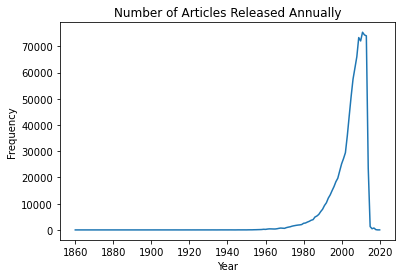

In [109]:
import matplotlib.pyplot as plt

plt.plot(releases_year.iloc[:, 0], releases_year.iloc[:,1])
plt.title("Number of Articles Released Annually")
plt.xlabel("Year")
plt.ylabel("Frequency")

In [99]:
len(journal_df)

1000000